In [1]:

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [6]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
model = Sequential()
# We build the model using convolutional layers followed by max pooling layers
# Max pooling layers are used to down sample the feature maps summarizing the most actived presence of a feature
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
# We use softmax as the activation to represent the confidence (0-1)
model.add(Dense(10, activation='softmax'))

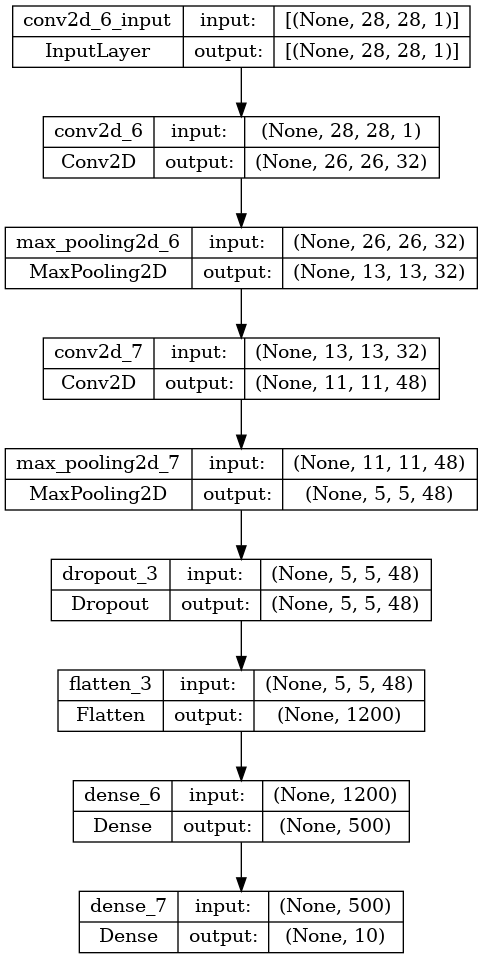

In [13]:
plot_model(model, 'model.png', show_shapes=True)

In [14]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 14s - loss: 0.2386 - accuracy: 0.9246 - val_loss: 0.0534 - val_accuracy: 0.9858 - 14s/epoch - 34ms/step
Epoch 2/10
422/422 - 12s - loss: 0.0782 - accuracy: 0.9751 - val_loss: 0.0386 - val_accuracy: 0.9900 - 12s/epoch - 29ms/step
Epoch 3/10
422/422 - 16s - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0376 - val_accuracy: 0.9895 - 16s/epoch - 38ms/step
Epoch 4/10
422/422 - 16s - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.0291 - val_accuracy: 0.9920 - 16s/epoch - 38ms/step
Epoch 5/10
422/422 - 15s - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0266 - val_accuracy: 0.9922 - 15s/epoch - 36ms/step
Epoch 6/10
422/422 - 16s - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0289 - val_accuracy: 0.9920 - 16s/epoch - 37ms/step
Epoch 7/10
422/422 - 15s - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.0254 - val_accuracy: 0.9928 - 15s/epoch - 36ms/step
Epoch 8/10
422/422 - 16s - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.0247 - val_accuracy: 0.9928 - 16s/epoch - 38ms/step


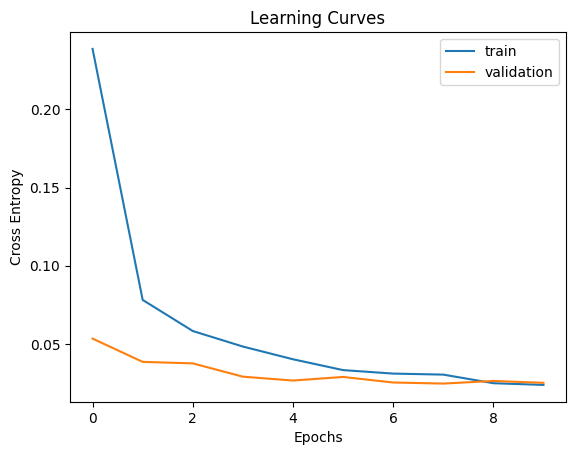

In [17]:
# ploting the learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [16]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.19999837875366
